# Ukraine Russia War Twitter Sentiment Analysis using Python

Conflict between Russia and Ukraine has sparked widespread international involvement, with numerous nations backing Ukraine through the implementation of economic sanctions against Russia. Social media platforms are abuzz with discussions surrounding the war, featuring updates on the situation on the ground, personal sentiments, and declarations of support for various sides.

I've sourced my dataset for Twitter sentiment analysis on the Ukraine-Russia conflict from Kaggle. It's originally compiled from Twitter feeds and undergoes regular updates to ensure relevance.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

twitter_data = pd.read_csv("filename.csv")
print(twitter_data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na


Let's quickly review all the column names in the dataset.

In [2]:
twitter_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

We'll streamline our focus for this task by narrowing down to three essential columns: username, tweet content, and language. I'll extract and proceed with these specific columns.

In [3]:
twitter_data = twitter_data[["username", "tweet", "language"]]

Let's check if any of these columns have null values.

In [4]:
twitter_data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

Great news – none of the columns contain null values. Now, let's quickly examine the distribution of tweets across different languages.

In [5]:
twitter_data['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

English tweets dominate the dataset. Now, let's prep the data for sentiment analysis. I'll start by removing links, punctuation, symbols, and any linguistic inconsistencies from the tweets.

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
twitter_data["tweet"] = twitter_data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, let's explore a word cloud generated from the tweets. It'll visualize the most commonly used words by individuals expressing their sentiments and updates regarding the conflict between Ukraine and Russia.

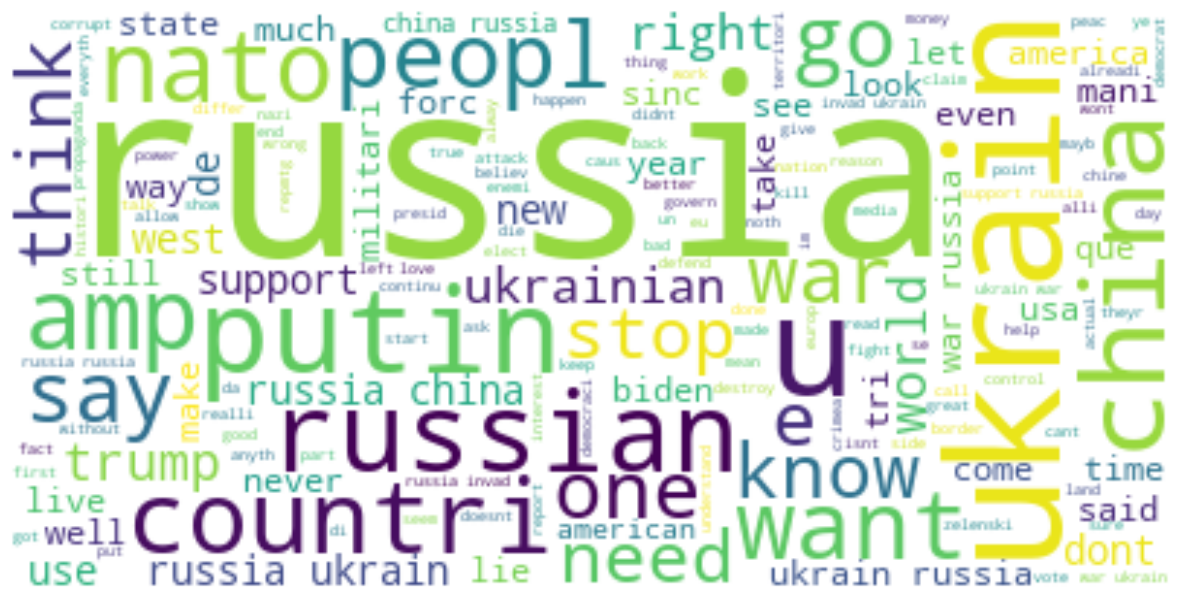

In [10]:
text = " ".join(i for i in twitter_data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets.

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
twitter_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in twitter_data["tweet"]]
twitter_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in twitter_data["tweet"]]
twitter_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in twitter_data["tweet"]]
twitter_data = twitter_data[["tweet", "Positive", "Negative", "Neutral"]]
print(twitter_data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3          mainelif baddcompani alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


Now, let's examine the most frequent words used by individuals expressing positive sentiments.

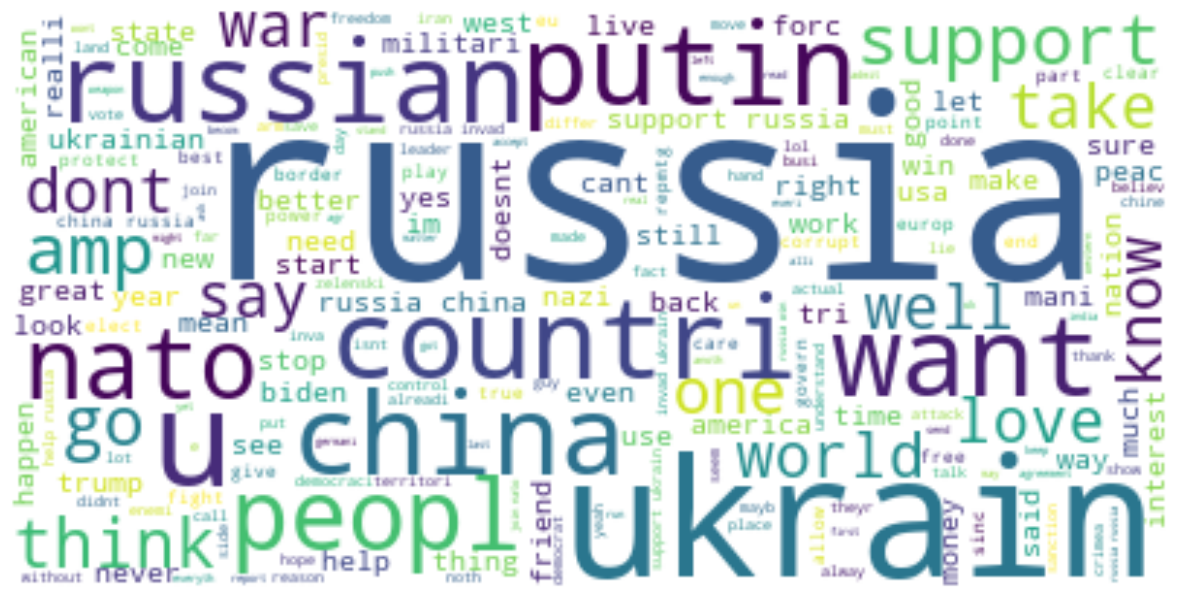

In [12]:
positive =' '.join([i for i in twitter_data['tweet'][twitter_data['Positive'] > twitter_data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, let's delve into the most frequent words used by individuals expressing negative sentiments.

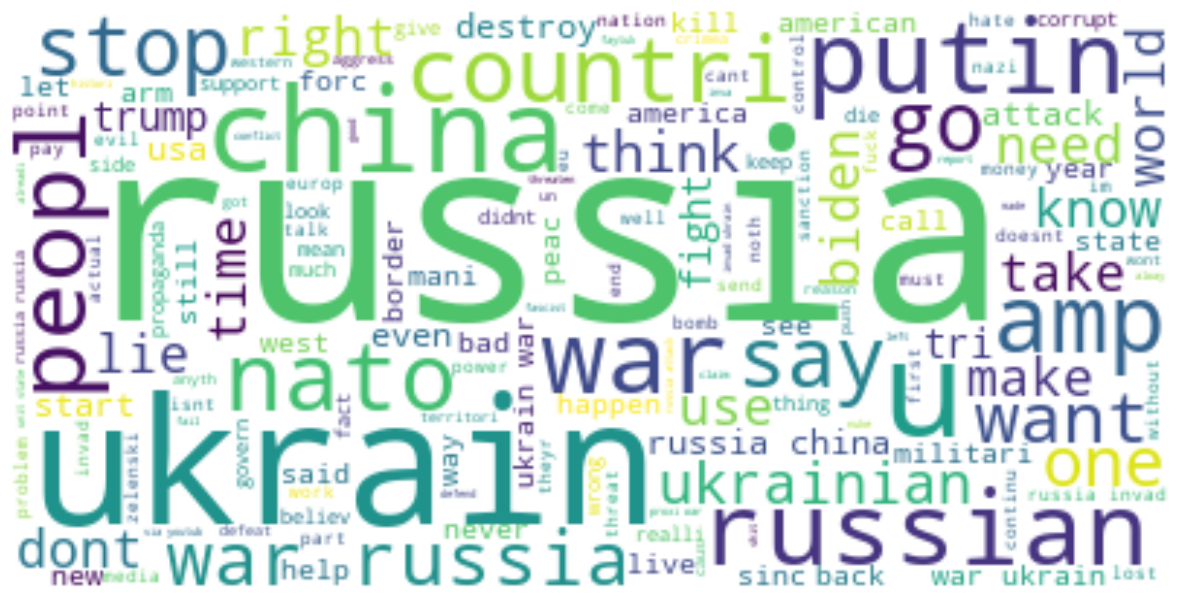

In [13]:
negative =' '.join([i for i in twitter_data['tweet'][twitter_data['Negative'] > twitter_data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Summary

Numerous tweets regarding the conflict between Ukraine and Russia offer updates on the ground realities, personal sentiments, and expressions of support for various sides. I've leveraged these tweets for conducting sentiment analysis on the Ukraine-Russia war.